# NLP - Tfidf
## Universitatea din Bucuresti, Facultatea de Matematica si Informatica
## Autor: Bogdan Macovei, Grupa: 344, Optional anul III, Licenta

## Partea 0 - NLP

In dataset-ul primit avem informatii despre 20 de autori, fiecare autor avand 20 de texte si fiecare text avand in jur de 50.000 de caractere.
Vom transforma datele utilizand metoda TfidfVectorizer.

In [1]:
import pandas as pd

In [2]:
globalPath = 'C:\\Users\\asus\\PycharmProjects\\firstproject\\MLHW2\\MacoveiCCBogdan.csv'
documents = pd.read_csv(globalPath)

Vom stoca si lista autorilor pe care ii avem in dataset:

In [3]:
authors = ['Lord Byron', 'Joseph Conrad', 'Wilkie Collins',
           'Thomas Carlyle', 'Charles Darwin', 'Charles Dickens',
           'Edward Phillips Oppenheim', 'John Galsworthy', 'Thomas Hardy',
           'Andrew Lang', 'Harold Bindloss', 'William Dean Howells',
           'John Ruskin', 'Charles Kingsley', 'Sir Arthur Conan Doyle',
           'Zane Grey', 'Louisa May Alcott', 'Jack London',
           'Daniel Defoe', 'Washington Irving']

Vom retine un vector de 400 de texte in $\mathbf{df}$, si vom folosi aceasta structura pentru transformarea textelor in componente numerice:

In [4]:
df = []
for j, author in enumerate(authors):
    for index in range(0, 20):
        df.append(documents[author][index]
          .replace("-", '').replace(",", '').replace(".", '').replace("[", '')
          .replace("]", '').replace("_", '').replace("\\", '').replace("\'", '')
          .replace("0", '').replace("1", '').replace("2", '').replace("3", '').replace("4", '')
          .replace("5", '').replace("6", '').replace("7", '').replace("8", '').replace("9", '')
          .replace("(", '').replace(")", '').lower())
# am eliminat manual anumite caractere, desi le voi elimina utilizand
# token_pattern-ul din TfidfVectorizer

Aplicam acum TfidfVectorizer pentru transformarea textelor in componente numerice:

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')
vector = vectorizer.fit_transform(df)

In [23]:
vector.shape

(400, 313410)

In [15]:
X = vector.toarray()

In [26]:
X[0][150:190]

array([0.01314632, 0.00259692, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00304841, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Acum, $\mathbf{X}$ reprezinta un vector care poate fi utilizat in algoritmii implementati in sklearn. Inainte de a incepe task-urile efective (SVM si Clustering), vom utiliza PCA pentru a vizualiza datele.

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [64]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

Vom plota datele intr-o forma care sa ne permita identificarea autorilor:

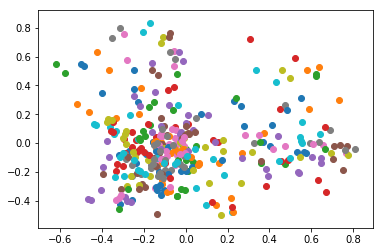

In [66]:
for j, author in enumerate(authors):
    result_local = pca.fit_transform(X[20*j:20*(j+1)-1, :])
    plt.scatter(result_local[:, 0], result_local[:, 1])

Vom vizualiza datele si in 3D, utilizand tot tehnica PCA, alegand, de aceasta data, n_components=3:

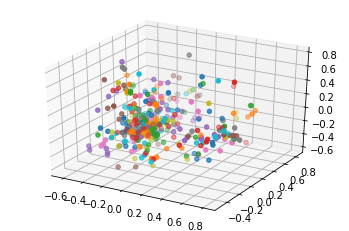

In [67]:
from mpl_toolkits.mplot3d import Axes3D
pca3d = PCA(n_components=3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j, author in enumerate(authors):
    result3d_local = pca3d.fit_transform(X[20*j:20*(j+1)-1, :])
    ax.scatter(result3d_local[:, 0], result3d_local[:, 1], result3d_local[:, 2])
    

Putem vizualiza datele din mai multe unghiuri, de exemplu pentru un unghi $\alpha$ $\in$ $\{ 0^0, 30^0, 60^0, 90^0, 120^0, 150^0, 180^0\}$

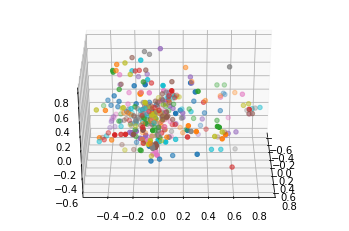

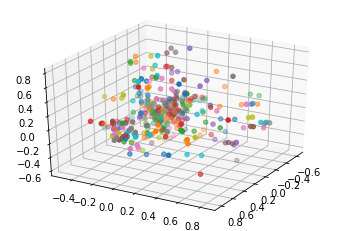

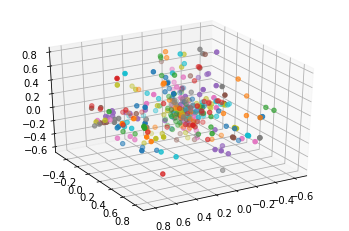

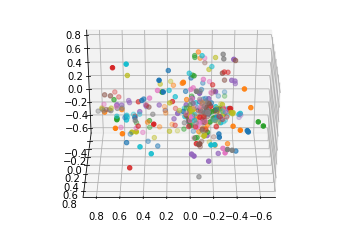

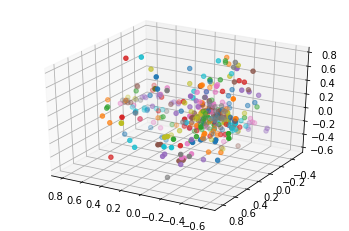

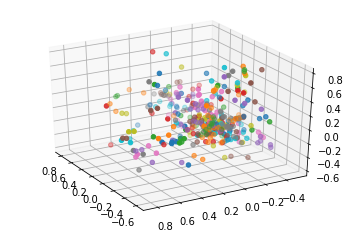

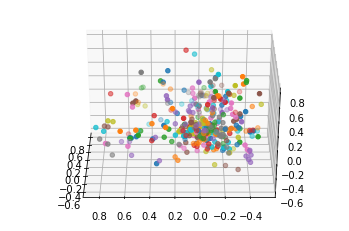

In [74]:
for alpha in [0, 30, 60, 90, 120, 150, 180]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, alpha)
    for j, author in enumerate(authors):
        result3d_local = pca3d.fit_transform(X[20*j:20*(j+1)-1, :])
        ax.scatter(result3d_local[:, 0], result3d_local[:, 1], result3d_local[:, 2])
    plt.show()

# Partea 1 - Support Vector Machine

Inainte de a studia care sunt cei mai buni parametri pentru algoritm, vom crea un vector de labeluri, y, care va contine 400 de intrari: primele 20 vor avea label-ul 1 si vor corespunde primului autor, urmatoarele 20 vor avea label-ul 2 si vor corespunde celui de-al doilea autor etc.

In [75]:
y = []
for j, author in enumerate(authors):
    y += [j + 1] * 20

Impartim acum datele in train si test, utilizand metoda train_test_split:

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
from sklearn.svm import SVC

Fixam pentru algoritm kernel='rbf', si vom testa pentru diferite valori ale lui gamma si C care este acuratetea modelului, alegand varianta cea mai convenabila:

In [62]:
for gamma_ in [0.0001, 0.001, 0.01, 0.1, 1]:
    for C_ in [1, 10, 100, 1000]:
        clf = SVC(kernel='rbf', gamma=gamma_, C=C_)
        clf.fit(X_train, y_train)
        y_pred_local = clf.predict(X_test)
        print("gamma =", gamma_, "; C =", C_, "; Accuracy =", accuracy_score(y_test, y_pred_local))

gamma= 0.0001 ; C= 1 ; Accuracy= 0.04
gamma= 0.0001 ; C= 10 ; Accuracy= 0.04
gamma= 0.0001 ; C= 100 ; Accuracy= 0.04
gamma= 0.0001 ; C= 1000 ; Accuracy= 0.04
gamma= 0.001 ; C= 1 ; Accuracy= 0.04
gamma= 0.001 ; C= 10 ; Accuracy= 0.04
gamma= 0.001 ; C= 100 ; Accuracy= 0.04
gamma= 0.001 ; C= 1000 ; Accuracy= 0.63
gamma= 0.01 ; C= 1 ; Accuracy= 0.04
gamma= 0.01 ; C= 10 ; Accuracy= 0.04
gamma= 0.01 ; C= 100 ; Accuracy= 0.63
gamma= 0.01 ; C= 1000 ; Accuracy= 0.95
gamma= 0.1 ; C= 1 ; Accuracy= 0.04
gamma= 0.1 ; C= 10 ; Accuracy= 0.63
gamma= 0.1 ; C= 100 ; Accuracy= 0.95
gamma= 0.1 ; C= 1000 ; Accuracy= 0.96
gamma= 1 ; C= 1 ; Accuracy= 0.62
gamma= 1 ; C= 10 ; Accuracy= 0.94
gamma= 1 ; C= 100 ; Accuracy= 0.95
gamma= 1 ; C= 1000 ; Accuracy= 0.95


Observam ca cele mai bune modele sunt cele cu parametrii $(\gamma, C) \in \big{\{} (0.01, \ 1000); \ (0.1, \ 100);  \ (0.1, \ 1000); \ (1, \ 10); \ (1,  \ 100); \ (1,  \ 1000)\big{\}}$

Vom alege cel mai bun model tinand cont de semnificatiile celor doi parametri. Stim ca $\mathbf{gamma}$ este utilizat pentru a controla "raspandirea" regiunii de decizie. Cand valoarea acestui parametru este scazuta, curba limitei de decizie este scazuta, deci regiunea de decizie este larga. Pe de alta parte, cand valoarea parametrului $\mathbf{gamma}$ este mare, curba limitei de decizie este de asemena mare, creand o suprafata de decizie impartita pe "insule" de decizie in jurul punctelor date.

Parametrul $\mathbf{C}$ are rolul de a penaliza punctele clasificate gresit. Cand are valori mici, clasificatorul accepta si preziceri gresite (datorate variantei mici, unui bias ridicat), dar cand $\mathbf{C}$ este mare, clasificatorul este penalizat puternic, si se modeleaza incat sa evite orice punct de date incorect prezis.

Astfel, vom alege un set de parametri care sa nu se afle in cele doua extreme, pentru a evita underfitting-ul / overfitting-ul (de exemplu, pentru perechea (0.1, 1000) avem un C mult prea mare, deci care se modeleaza exagerat pentru a face o prezicere corecta, existand riscul de overfitting).

Vom alege, astfel, perechea (1, 100), si vom afisa informatii referitoare la precizia acestui model:

In [79]:
clf = SVC(kernel='rbf', gamma=1, C=100)
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
y_pred = clf.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
print("Accuracy is: ", accuracy_score(y_test, y_pred))

Accuracy is:  0.88


Vom aplica si kFold Corss Validation pentru a testa modelul selectat (svm.SVC cu kernel='rbf', gamma=1 si C=100):

In [16]:
from sklearn.model_selection import KFold
import numpy as np
kf = KFold(n_splits=10)

In [95]:
accuracies = []
for k, (train_index, test_index) in enumerate(kf.split(X_train)):
    xx_train = X_train[train_index]
    y_train_local = np.asarray(y_train)
    yy_train = y_train_local[train_index]
    
    xx_validation = X_train[test_index]
    yy_validation = y_train_local[test_index]
    
    svm = SVC(kernel='rbf', gamma=1, C=100)
    svm.fit(xx_train, yy_train)
    
    validation_accuracy = accuracy_score(svm.predict(xx_validation), yy_validation)
    accuracies.append(validation_accuracy)
    
    print("Split", k, "validation accuracy", validation_accuracy)
print ("Average validation accuracy:", np.average(accuracies))

Split 0 validation accuracy 1.0
Split 1 validation accuracy 0.9666666666666667
Split 2 validation accuracy 0.9666666666666667
Split 3 validation accuracy 0.9333333333333333
Split 4 validation accuracy 0.9333333333333333
Split 5 validation accuracy 1.0
Split 6 validation accuracy 0.9333333333333333
Split 7 validation accuracy 0.9333333333333333
Split 8 validation accuracy 0.9666666666666667
Split 9 validation accuracy 0.9666666666666667
Average validation accuracy: 0.96


Vom utiliza tehnica PCA pentru a reduce dimensiunea si vom reaplica SVM:

In [83]:
pca_svm = PCA(n_components=3)
X_pca = pca_svm.fit_transform(X)

In [84]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=42)

In [85]:
svm_pca = SVC(kernel='rbf', gamma=1, C=100)
svm_pca.fit(X_train_pca, y_train_pca)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
y_pred_svm = svm_pca.predict(X_test_pca)

In [87]:
print("Accuracy is", accuracy_score(y_test_pca, y_pred_svm))

Accuracy is 0.48


Observam ca accuracy score este mic, asa ca vom relua procedeul utilizat pentru determinarea celor mai buni parametri:

In [102]:
for gamma_ in [0.0001, 0.001, 0.01, 0.1, 1]:
    for C_ in [1, 10, 100, 1000]:
        svm_pca = SVC(kernel='rbf', gamma=gamma_, C=C_)
        svm_pca.fit(X_train_pca, y_train_pca)
        y_pred_local = svm_pca.predict(X_test_pca)
        print("gamma =", gamma_, "; C =", C_, "; Accuracy =", accuracy_score(y_test_pca, y_pred_local))

gamma = 0.0001 ; C = 1 ; Accuracy = 0.04
gamma = 0.0001 ; C = 10 ; Accuracy = 0.04
gamma = 0.0001 ; C = 100 ; Accuracy = 0.04
gamma = 0.0001 ; C = 1000 ; Accuracy = 0.04
gamma = 0.001 ; C = 1 ; Accuracy = 0.04
gamma = 0.001 ; C = 10 ; Accuracy = 0.04
gamma = 0.001 ; C = 100 ; Accuracy = 0.04
gamma = 0.001 ; C = 1000 ; Accuracy = 0.15
gamma = 0.01 ; C = 1 ; Accuracy = 0.04
gamma = 0.01 ; C = 10 ; Accuracy = 0.04
gamma = 0.01 ; C = 100 ; Accuracy = 0.15
gamma = 0.01 ; C = 1000 ; Accuracy = 0.6
gamma = 0.1 ; C = 1 ; Accuracy = 0.04
gamma = 0.1 ; C = 10 ; Accuracy = 0.15
gamma = 0.1 ; C = 100 ; Accuracy = 0.6
gamma = 0.1 ; C = 1000 ; Accuracy = 0.54
gamma = 1 ; C = 1 ; Accuracy = 0.15
gamma = 1 ; C = 10 ; Accuracy = 0.58
gamma = 1 ; C = 100 ; Accuracy = 0.56
gamma = 1 ; C = 1000 ; Accuracy = 0.63


Observam ca valorile obtinute sunt mai mici, deci modelul este mai slab in momentul in care incercam sa-i reducem dimensiunea la 3. Vom studia, in continuare, modelul cel mai bun obtinut la pasii anteriori, plotand matricea de confuzie si un set general de rapoarte:

In [105]:
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [109]:
# Functia este preluata din cursul Machine Learning with Python de pe Coursera
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [115]:
cnf_matrix = confusion_matrix(y_pred, y_test)

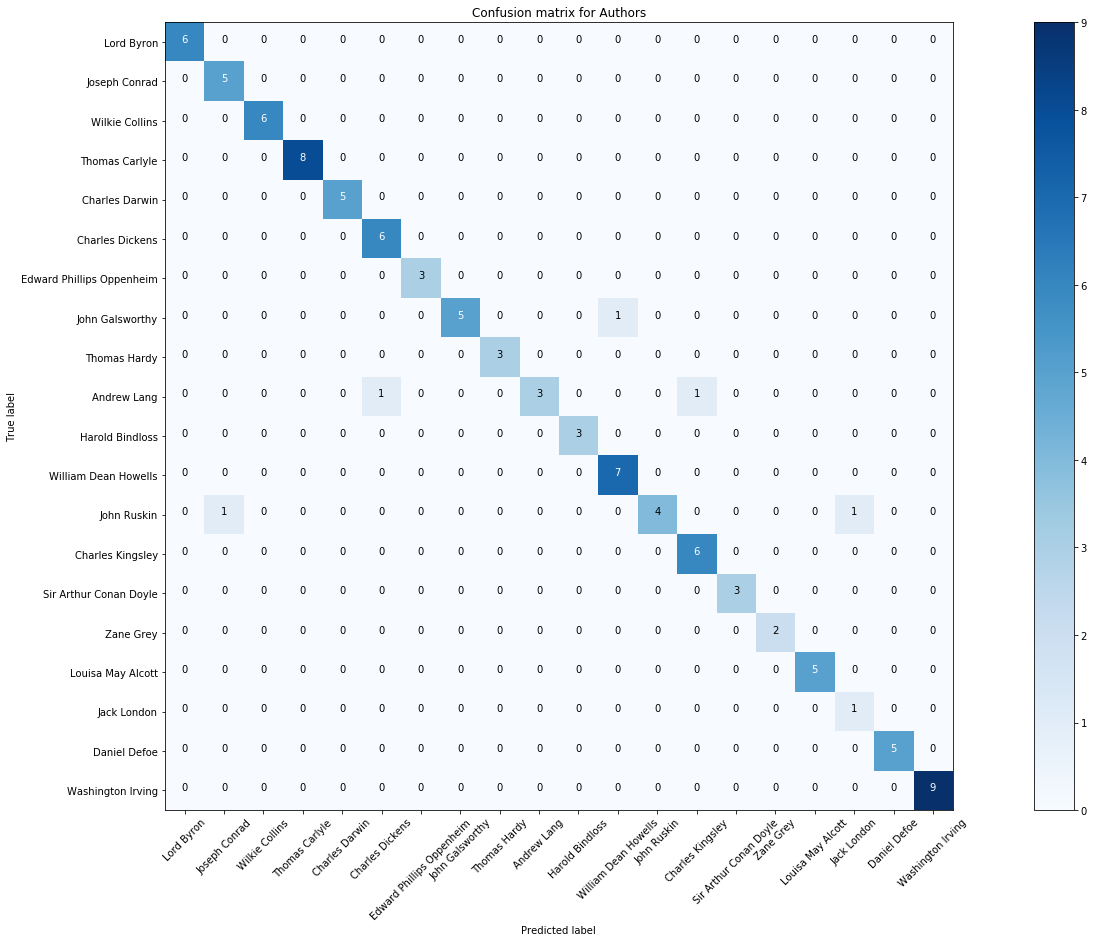

In [116]:
plt.figure(figsize=(23,13))
plot_confusion_matrix(cnf_matrix, classes=authors, normalize=False, title='Confusion matrix for Authors')

In [119]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         3
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00         3
          10       1.00      0.60      0.75         5
          11       1.00      1.00      1.00         3
          12       0.88      1.00      0.93         7
          13       1.00      0.67      0.80         6
          14       0.86      1.00      0.92         6
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         5
          18       0.50    

# Partea 2 - Clustering

## 2.1 DBSCAN

Vom antrena un model utilizand parametrii default din DBSCAN-ul din sklearn, iar apoi vom determina valori cat mai bune pentru $\varepsilon$ si min_samples.

In [16]:
from sklearn.cluster import DBSCAN

In [121]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [122]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print("clusters:", dict(zip(unique, counts)))

clusters: {-1: 33, 0: 367}


Observam ca obtinem un singur cluster care are o raza foarte mare, incat cuprinde 367/400 de texte, iar 33 dintre acestea nu apartin niciunul cluster. O solutie este sa micsoram raza, pentru a obtine mai multe clustere, iar pentru acest lucru, vom aplica euristica descrisa in curs:

- determinam pentru fiecare punct $x(i)$ distanta $d_k(i)$ pana la cel mai apropiat al $k$-lea vecin al sau;
- ordonam crescator distantele;
- alegem valorile pentru $\varepsilon$ din graficele obtinute (pentru diferite valori ale lui $k$) si min_samples = k.

In [17]:
from sklearn.neighbors import NearestNeighbors

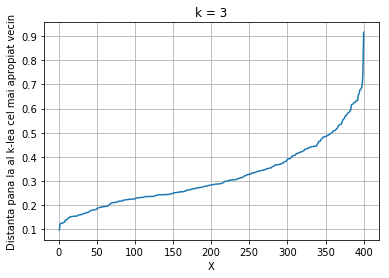

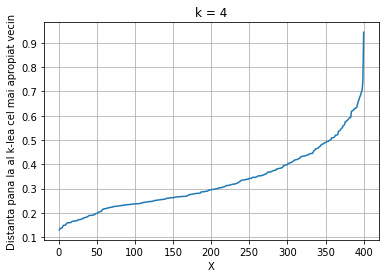

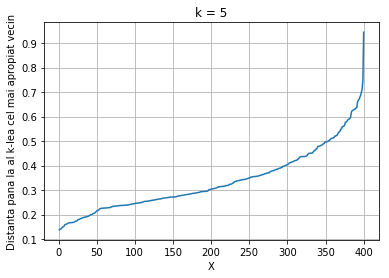

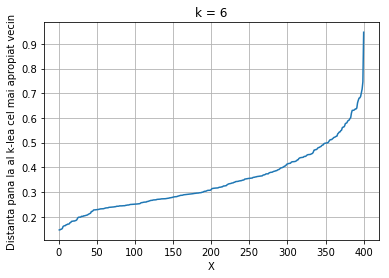

In [86]:
for k_ in range(3, 7):
    knn_ = NearestNeighbors(n_neighbors=k_)
    knn_.fit(X)
    distance_ = knn_.kneighbors(X, return_distance=True)
    y_plot_ = np.array(distance_[0])
    x_plot_ = np.arange(1, 401, 1)
    y_plot_ = y_plot_[:,k_-1]
    y_plot_.sort()
    plt.plot(x_plot_, y_plot_)
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Distanta pana la al k-lea cel mai apropiat vecin')
    plt.title('k = ' + str(k_))
    plt.show()

Vom alege, conform graficului, $\varepsilon=0.5$ si min_sample = 4:

In [56]:
from sklearn.cluster import DBSCAN

In [58]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=None, p=None)

In [59]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print("clusters:", dict(zip(unique, counts)))

clusters: {-1: 31, 0: 369}


Observam ca rezultatul obtinut nu e multumitor, astfel ca vom mai varia parametrii de intrare:

In [66]:
epsilon = np.arange(0.3, 0.65, 0.05)
for eps_ in epsilon:
    for minsample in [3, 4, 5]:
        dbscan_local = DBSCAN(eps=eps_, min_samples=minsample)
        dbscan_local.fit(X)
        unique, counts = np.unique(dbscan_local.labels_, return_counts=True)
        print("eps:", eps_, "min sample:", minsample, "clusters:", dict(zip(unique, counts)))

eps: 0.3 min sample: 3 clusters: {-1: 157, 0: 240, 1: 3}
eps: 0.3 min sample: 4 clusters: {-1: 163, 0: 237}
eps: 0.3 min sample: 5 clusters: {-1: 168, 0: 232}
eps: 0.35 min sample: 3 clusters: {-1: 109, 0: 281, 1: 3, 2: 4, 3: 3}
eps: 0.35 min sample: 4 clusters: {-1: 120, 0: 280}
eps: 0.35 min sample: 5 clusters: {-1: 121, 0: 279}
eps: 0.39999999999999997 min sample: 3 clusters: {-1: 79, 0: 318, 1: 3}
eps: 0.39999999999999997 min sample: 4 clusters: {-1: 82, 0: 318}
eps: 0.39999999999999997 min sample: 5 clusters: {-1: 82, 0: 318}
eps: 0.44999999999999996 min sample: 3 clusters: {-1: 52, 0: 348}
eps: 0.44999999999999996 min sample: 4 clusters: {-1: 53, 0: 347}
eps: 0.44999999999999996 min sample: 5 clusters: {-1: 54, 0: 346}
eps: 0.49999999999999994 min sample: 3 clusters: {-1: 31, 0: 369}
eps: 0.49999999999999994 min sample: 4 clusters: {-1: 31, 0: 369}
eps: 0.49999999999999994 min sample: 5 clusters: {-1: 33, 0: 367}
eps: 0.5499999999999999 min sample: 3 clusters: {-1: 20, 0: 380}
ep

Deoarece obtinem tot un numar mare de clustere, studiem ce se intampla in momentul in care $\varepsilon$ scade, alegand valorile 0.2 si 0.25.

In [67]:
for minsample in range(2, 5):
    dbscan_local = DBSCAN(eps=0.2, min_samples=minsample)
    dbscan_local.fit(X)
    unique, counts = np.unique(dbscan_local.labels_, return_counts=True)
    print("eps:", 0.1, "min sample:", minsample, "clusters:", dict(zip(unique, counts)))

eps: 0.1 min sample: 2 clusters: {-1: 291, 0: 2, 1: 2, 2: 3, 3: 2, 4: 3, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 4, 13: 2, 14: 2, 15: 33, 16: 8, 17: 2, 18: 3, 19: 4, 20: 2, 21: 5, 22: 5, 23: 9, 24: 2, 25: 2}
eps: 0.1 min sample: 3 clusters: {-1: 323, 0: 3, 1: 3, 2: 4, 3: 33, 4: 8, 5: 3, 6: 4, 7: 5, 8: 5, 9: 9}
eps: 0.1 min sample: 4 clusters: {-1: 333, 0: 4, 1: 33, 2: 7, 3: 4, 4: 5, 5: 9, 6: 5}


In [68]:
for minsample in range(2,5):
    dbscan_local = DBSCAN(eps=0.25, min_samples=minsample)
    dbscan_local.fit(X)
    unique, counts = np.unique(dbscan_local.labels_, return_counts=True)
    print("eps:", 0.25, "min sample:", minsample, "clusters:", dict(zip(unique, counts)))

eps: 0.25 min sample: 2 clusters: {-1: 202, 0: 5, 1: 149, 2: 2, 3: 2, 4: 2, 5: 3, 6: 5, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 8, 14: 3, 15: 5, 16: 2}
eps: 0.25 min sample: 3 clusters: {-1: 222, 0: 5, 1: 149, 2: 5, 3: 3, 4: 8, 5: 3, 6: 5}
eps: 0.25 min sample: 4 clusters: {-1: 235, 0: 4, 1: 145, 2: 4, 3: 8, 4: 4}


Observam ca pentru valori mai mici ale lui min_samples, obtinem mai putine puncte care nu sunt incadrate intr-un grafic, si alegand si valori mici pentru $\varepsilon$, obtinem si un numar mai mare de clustere (si nu doar un cluster cu o raza foarte mare). Conform variatiei datelor, ne vom fixa asupra unei raze $\varepsilon = 0.35$ si a unui numar min_samples = 2.

In [71]:
dbscan_local = DBSCAN(eps=0.35, min_samples=2)
dbscan_local.fit(X)
unique, counts = np.unique(dbscan_local.labels_, return_counts=True)
print("eps:", 0.28, "min sample:", minsample, "clusters:", dict(zip(unique, counts)))

eps: 0.28 min sample: 2 clusters: {-1: 103, 0: 281, 1: 3, 2: 4, 3: 3, 4: 2, 5: 2, 6: 2}


In [38]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score

In [79]:
print("For DBSCAN(eps=0.35, min_samples=2)")
print("Silhouette score:", silhouette_score(X, dbscan_local.labels_))
print("Adjusted rand score:", adjusted_rand_score(y, dbscan_local.labels_))
print("Homogeneity score:", homogeneity_score(y, dbscan_local.labels_))
print("Completeness:", completeness_score(y, dbscan_local.labels_))

print()
print("For DBSCAN(eps=0.5, min_samples=4)")
print("Silhouette score:", silhouette_score(X, dbscan.labels_))
print("Adjusted rand score:", adjusted_rand_score(y, dbscan.labels_))
print("Homogeneity score:", homogeneity_score(y, dbscan.labels_))
print("Completeness:", completeness_score(y, dbscan.labels_))

For DBSCAN(eps=0.35, min_samples=2)
Silhouette score: 0.05373443913123507
Adjusted rand score: 0.03481957228754562
Homogeneity score: 0.1375689838392182
Completeness: 0.5175185258627799

For DBSCAN(eps=0.5, min_samples=4)
Silhouette score: 0.27799192865343086
Adjusted rand score: 0.0029768057220821123
Homogeneity score: 0.033802810374281296
Completeness: 0.3714471947854662


Rezultatele obtinute sunt relativ slabe, asa ca vom continua studiul clusterelor utilizand metoda k-means.

## 2.2 kMeans

Vom implementa kMeans, studiind rezultatele pe care le obtinem pentru un numar $n$ de clustere, $n \in \{2, 3..., 19\}$; Pentru aceasta, vom utiliza hiperparametrul $init = k-means++$. In functie de scorurile obtinute (silhouette, adjusted rand score, homogeneity si completeness) vom alege modelul / modelele care reflecta cat mai bine o anumita grupare a datelor, dupa criterii ce vor fi stabilite dupa vizualizarea rapoartelor.
Ca observatie: alegem valorea pentru $init$ sa fie $k-means++$ deoarece, conform documentatiei, aceasta varianta selecteaza centrele initiale ale clusterelor intr-un mod suficient de bun incat sa creasca viteza de convergenta.

In [88]:
from sklearn.cluster import KMeans

In [90]:
for n in range(2, 20):
    kmeans = KMeans(n_clusters=n, init='k-means++')
    kmeans.fit(X)
    print(n)
    print("Silhouette score:", silhouette_score(X, kmeans.labels_))
    print("Adjusted rand score:", adjusted_rand_score(y, kmeans.labels_))
    print("Homogeneity score:", homogeneity_score(y, kmeans.labels_))
    print("Completeness:", completeness_score(y, kmeans.labels_))

2
Silhouette score: 0.1168247583151356
Adjusted rand score: 0.05832678711704635
Homogeneity score: 0.14258079529472503
Completeness: 0.6278684593274002
3
Silhouette score: 0.03712469757847079
Adjusted rand score: 0.09156962159801209
Homogeneity score: 0.22291999377917313
Completeness: 0.6613614700274532
4
Silhouette score: 0.048474727382259705
Adjusted rand score: 0.14589552238805972
Homogeneity score: 0.305432910521897
Completeness: 0.6934169779969763
5
Silhouette score: 0.03280212343330352
Adjusted rand score: 0.18363219630578403
Homogeneity score: 0.35854805822794017
Completeness: 0.6961885908138679
6
Silhouette score: 0.04088219073962618
Adjusted rand score: 0.180178702788307
Homogeneity score: 0.381389411023865
Completeness: 0.7096761839896503
7
Silhouette score: 0.037180114515380495
Adjusted rand score: 0.15962319592083657
Homogeneity score: 0.3763831156886419
Completeness: 0.7343967933904816
8
Silhouette score: 0.03228659225752268
Adjusted rand score: 0.2908818067822857
Homogene

In [32]:
kmeans = KMeans(n_clusters=7, init='k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([2, 4, 2, 2, 0, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 6, 0,
       6, 6, 2, 2, 6, 6, 6, 2, 6, 0, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6, 6, 2,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 0, 4, 4, 2, 4, 0, 4, 4, 4, 4, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 5, 2, 2, 5, 2, 2, 2, 2, 5, 5,
       5, 6, 2, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 6, 1, 1, 6, 1, 6, 6, 6, 5,
       6, 6, 6, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 2, 6, 6,
       6, 6, 6, 6, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 5, 1, 1, 1, 2, 1, 1, 2, 1, 5, 2, 4, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 5, 4, 4, 4, 4, 4, 2, 4, 2, 6, 0, 2, 2, 2,
       2, 2, 6, 2, 6, 6, 2, 2, 2, 6, 6, 6, 6, 2, 1,

In [34]:
from collections import Counter
for j, author in enumerate(authors):
    arr_ = kmeans.labels_[20*j : 20*(j+1) - 1]
    arr = np.array(arr_)
    counter = Counter(arr)
    print(author, counter.most_common(1))

Lord Byron [(2, 12)]
Joseph Conrad [(6, 13)]
Wilkie Collins [(6, 18)]
Thomas Carlyle [(4, 15)]
Charles Darwin [(3, 17)]
Charles Dickens [(5, 8)]
Edward Phillips Oppenheim [(6, 19)]
John Galsworthy [(6, 11)]
Thomas Hardy [(6, 17)]
Andrew Lang [(2, 8)]
Harold Bindloss [(1, 19)]
William Dean Howells [(1, 11)]
John Ruskin [(0, 19)]
Charles Kingsley [(4, 15)]
Sir Arthur Conan Doyle [(2, 10)]
Zane Grey [(1, 18)]
Louisa May Alcott [(5, 19)]
Jack London [(1, 9)]
Daniel Defoe [(4, 17)]
Washington Irving [(2, 12)]


Am tratat separat cazul in care $n = 7$, alegerea fiind sustinuta de cresterea Completeness score-ului fata de cazurile anterioare si fata de numarul de clustere care urmeaza. Obtinem rezultatul prezentat mai sus, si vom compara datele cu date reale despre autorii englezi dati. Folosim, astfel, interpretarile din urmatorul tabel (ca observatie, datele reale au fost preluate de pe Wikipedia, iar anul aproximativ a fost selectat, pentru fiecare autor, undeva la jumatatea vietii acestuia, si nu neaparat in anul scrierii unor lucrari importante).

<table class="tg">
  <tr>
    <th class="tg-3r9o">Cluster</th>
    <th class="tg-3r9o">Autor</th>
    <th class="tg-3r9o">Tipul de scriere</th>
    <th class="tg-3r9o">An aproximativ</th>
  </tr>
  <tr>
    <td class="tg-28l8">0</td>
    <td class="tg-28l8">John Ruskin</td>
    <td class="tg-28l8">critic de arta, filosof</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-mn4z">1</td>
    <td class="tg-mn4z">Harold Bindloss</td>
    <td class="tg-mn4z">romancier realist</td>
    <td class="tg-mn4z">1900</td>
  </tr>
  <tr>
    <td class="tg-mn4z">1</td>
    <td class="tg-mn4z">William Dean Howells</td>
    <td class="tg-mn4z">romancier realist</td>
    <td class="tg-mn4z">1860</td>
  </tr>
  <tr>
    <td class="tg-mn4z">1</td>
    <td class="tg-mn4z">Zane Grey</td>
    <td class="tg-mn4z">romancier realist</td>
    <td class="tg-mn4z">1900</td>
  </tr>
  <tr>
    <td class="tg-mn4z">1</td>
    <td class="tg-mn4z">Jack London</td>
    <td class="tg-mn4z">romancier filosof</td>
    <td class="tg-mn4z">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">2</td>
    <td class="tg-28l8">Lord Byron</td>
    <td class="tg-28l8">poet, romantism</td>
    <td class="tg-28l8">1800</td>
  </tr>
  <tr>
    <td class="tg-28l8">2</td>
    <td class="tg-28l8">Andrew Lang</td>
    <td class="tg-28l8">poet, romancier, critic</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">2</td>
    <td class="tg-28l8">Sir Arthur Conan Doyle</td>
    <td class="tg-28l8">romancier, roman politist</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">2</td>
    <td class="tg-28l8">Washington Irving</td>
    <td class="tg-28l8">eseist, romantism</td>
    <td class="tg-28l8">1810</td>
  </tr>
  <tr>
    <td class="tg-mn4z">3</td>
    <td class="tg-mn4z">Charles Darwin</td>
    <td class="tg-mn4z">biolog, geolog</td>
    <td class="tg-mn4z">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">4</td>
    <td class="tg-28l8">Thomas Carlyle</td>
    <td class="tg-28l8">romancier istoric</td>
    <td class="tg-28l8">1830</td>
  </tr>
  <tr>
    <td class="tg-28l8">4</td>
    <td class="tg-28l8">Charles Kingsley</td>
    <td class="tg-28l8">romancier istoric</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">4</td>
    <td class="tg-28l8">Daniel Defoe</td>
    <td class="tg-28l8">scriitor, jurnalist</td>
    <td class="tg-28l8">1700</td>
  </tr>
  <tr>
    <td class="tg-mn4z">5</td>
    <td class="tg-mn4z">Charles Dickens</td>
    <td class="tg-mn4z">romancier realist</td>
    <td class="tg-mn4z">1850</td>
  </tr>
  <tr>
    <td class="tg-mn4z">5</td>
    <td class="tg-mn4z">Louisa May Alcott</td>
    <td class="tg-mn4z">romancier realist</td>
    <td class="tg-mn4z">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">6</td>
    <td class="tg-28l8">Edward Phillips Oppenheim</td>
    <td class="tg-28l8">romancier</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">6</td>
    <td class="tg-28l8">John Galsworthy</td>
    <td class="tg-28l8">romancier, dramaturg</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">6</td>
    <td class="tg-28l8">Thomas Hardy</td>
    <td class="tg-28l8">romancier, poet, naturalist</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">6</td>
    <td class="tg-28l8">Joseph Conrad</td>
    <td class="tg-28l8">romancier</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">6</td>
    <td class="tg-28l8">Wilkie Collins</td>
    <td class="tg-28l8">romancier, roman politist</td>
    <td class="tg-28l8">1850</td>
  </tr>
</table>

Observam ca autorii sunt grupati, in cea mai mare parte, dupa apartenenta reala intr-un anumit curent literar (romantism, realism), tipul de scriere (proza, poezie) si anul scrierii. De exemplu, cel de-al doilea cluster (indexat 1), contine autorii Harold Bindloss, William Dean Howells, Zane Grey si Jack London, toti scriind in jurul anului 1900 romane realiste (exceptie facand Jack London care a avut o opera filosofica, dar este apropiat ca moment al scrierii de ceilalti autori si, in plus, scrierea filosofica se apropie de o scriere realista, bazandu-se tot pe viata, obiceiurile oamenilor). 

De asemenea, observam faptul ca Charles Darwin este separat de toti ceilalti, datorandu-se scrierilor diferite, el fiind un om de stiinta si folosind cuvinte de specialitate (familia lexicala a termenilor din biologie, geologie, abordata filosofic); acelasi lucru se observa in cazul lui John Ruskin, care a fost un critic de arta.

Clusterul al 6-lea (format din Charles Dickens si Louisa May Alcott) contine si el scrieri realiste, insa apartin unei alte perioade fata de cei din al doilea cluster (aproximativ 1850 fata de aproximativ 1900).

Probleme de clasificare observam in cazul scriitorilor de romane politiste, pentru ca ne-am fi asteptat ca Wilkie Collins si Sir Arthur Conan Doyle sa fie grupati in acelasi cluster, ei reprezentand exceptii in modul in care au fost construite acestea.

Vom testa si cu valori foarte mari pentru numarul de clustere, pentru a vedea cum difera modul in care sunt grupati autorii (alegem numarul de clustere egal cu 19, deoarece am obtinut cele mai bune scoruri pentru aceasta valoare):

In [42]:
kmeans = KMeans(n_clusters=19, init='k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
from collections import Counter
for j, author in enumerate(authors):
    arr_ = kmeans.labels_[20*j : 20*(j+1) - 1]
    arr = np.array(arr_)
    counter = Counter(arr)
    print(author, counter.most_common(1))
    
print("Silhouette score:", silhouette_score(X, kmeans.labels_))
print("Adjusted rand score:", adjusted_rand_score(y, kmeans.labels_))
print("Homogeneity score:", homogeneity_score(y, kmeans.labels_))
print("Completeness:", completeness_score(y, kmeans.labels_))

Lord Byron [(14, 15)]
Joseph Conrad [(3, 13)]
Wilkie Collins [(3, 18)]
Thomas Carlyle [(11, 15)]
Charles Darwin [(16, 17)]
Charles Dickens [(17, 8)]
Edward Phillips Oppenheim [(6, 16)]
John Galsworthy [(17, 8)]
Thomas Hardy [(17, 16)]
Andrew Lang [(9, 7)]
Harold Bindloss [(7, 17)]
William Dean Howells [(17, 12)]
John Ruskin [(4, 19)]
Charles Kingsley [(1, 14)]
Sir Arthur Conan Doyle [(8, 17)]
Zane Grey [(17, 8)]
Louisa May Alcott [(5, 19)]
Jack London [(8, 15)]
Daniel Defoe [(2, 12)]
Washington Irving [(9, 19)]
Silhouette score: 0.05111372113477049
Adjusted rand score: 0.3914716728126047
Homogeneity score: 0.6288396160816209
Completeness: 0.7490980151378801


Vom obtine urmatoarea impartire pe clustere (in total sunt 13 clustere obtinute):
<table class="tg">
  <tr>
    <th class="tg-o5tf">Cluster</th>
    <th class="tg-o5tf">Autor</th>
    <th class="tg-o5tf">Tipul de scriere</th>
    <th class="tg-o5tf">An aproximativ</th>
  </tr>
  <tr>
    <td class="tg-28l8">0</td>
    <td class="tg-28l8">Charles Kingsley</td>
    <td class="tg-28l8">romancier istoric</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">1</td>
    <td class="tg-28l8">Daniel Defoe</td>
    <td class="tg-28l8">scriitor, jurnalist</td>
    <td class="tg-28l8">1700</td>
  </tr>
  <tr>
    <td class="tg-28l8">2</td>
    <td class="tg-28l8">Joseph Conrad</td>
    <td class="tg-28l8">romancier</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">2</td>
    <td class="tg-28l8">Wilkie Collins</td>
    <td class="tg-28l8">romancier, roman politist</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">3</td>
    <td class="tg-28l8">John Ruskin</td>
    <td class="tg-28l8">critic de arta, filosof</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">4</td>
    <td class="tg-28l8">Louisa May Alcott</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">5</td>
    <td class="tg-28l8">Edward Phillips Oppenheim</td>
    <td class="tg-28l8">romancier</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">6</td>
    <td class="tg-28l8">Harold Bindloss</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">7</td>
    <td class="tg-28l8">Sir Arthur Conan Doyle</td>
    <td class="tg-28l8">romancier, roman politist</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">7</td>
    <td class="tg-28l8">Jack London</td>
    <td class="tg-28l8">romancier filosof</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">8</td>
    <td class="tg-28l8">Andrew Lang</td>
    <td class="tg-28l8">poet, romancier, critic</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">8</td>
    <td class="tg-28l8">Washington Irving</td>
    <td class="tg-28l8">eseist, romantism</td>
    <td class="tg-28l8">1810</td>
  </tr>
  <tr>
    <td class="tg-28l8">9</td>
    <td class="tg-28l8">Thomas Carlyle</td>
    <td class="tg-28l8">romancier istoric</td>
    <td class="tg-28l8">1830</td>
  </tr>
  <tr>
    <td class="tg-28l8">10</td>
    <td class="tg-28l8">Lord Byron</td>
    <td class="tg-28l8">poet, romantism</td>
    <td class="tg-28l8">1800</td>
  </tr>
  <tr>
    <td class="tg-28l8">11</td>
    <td class="tg-28l8">Charles Darwin</td>
    <td class="tg-28l8">biolog, geolog</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">12</td>
    <td class="tg-28l8">Charles Dickens</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">12</td>
    <td class="tg-28l8">John Galsworthy</td>
    <td class="tg-28l8">romancier, dramaturg</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">12</td>
    <td class="tg-28l8">Thomas Hardy</td>
    <td class="tg-28l8">romancier, poet, naturalist</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">12</td>
    <td class="tg-28l8">William Dean Howells</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1860</td>
  </tr>
  <tr>
    <td class="tg-28l8">12</td>
    <td class="tg-28l8">Zane Grey</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1900</td>
  </tr>
</table>

In acest caz, modelul cu n = 19 clustere (pentru fragmentele date) va imparti autorii in 13 clustere, in general fiecare fiind separat in propriul sau cluster (astfel ca putem afirma ca prin clustering reusim sa facem o buna impartire a autorilor dati). Observam, de asemenea, ca unii autori raman grupati in acelasi cluster, si anume Joseph Conrad si Wilkie Collins, amandoi romancieri, insa cu perioade diferite de scriere (Joseph Conrad abordeaza si romanul politist, ceea ce poate justifica faptul ca cei doi au fost grupati); o situatie similara se intampla si in cazul autorilor Sir Arthur Conan Doyle si Jack London, romancieri de la finalul secolului al XIX-lea, Andrew Lang si Washington Irving, scriitori din secolul al XIX-lea (o justificare a gruparii lor poate fi faptul ca Andrew Lang a scris si poezii, iar Washington Irving este incadrat in romantism).
Cel mai mare cluster este al 13-lea, continand autorii Dickens, Galsworthy, Hardy, Howells si Grey, toti romancieri de la finalul secolului al XIX-lea, care au abordat scrieri realiste.

## 2.3 Agglomerative Clustering

Pentru modelul Agglomerative Clustering, vom testa diferite valori pentru numarul de clustere si, de asemenea, vom studia si modul in care se schimba acuratetea modelului in cazul in care vom aplica algoritmul pe o alta distanta in afara de cea euclidiana. Pentru modelele anterioare (DBSCAN si KMeans) am utilizat strict distanta euclidiana pentru doua puncte in spatiu, aceasta fiind metoda cea mai intuitiva (in DBSCAN pentru ca se bazeaza pe zonele dense de puncte, in KMeans pentru ca se calculeaza distante reale intre puncte pentru a putea fixa centrele clusterelor).

Numarul de clustere va fi variat de la 4 la 19, iar distantele pe care le vom testa vor fi euclidean, manhattan si cosine.

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [54]:
for n in range(4, 20):
    agglomerative = AgglomerativeClustering(n_clusters=n, affinity='euclidean')
    agglomerative.fit(X)
    print(n, 'euclidean')
    print("Silhouette score:", silhouette_score(X, agglomerative.labels_))
    print("Adjusted rand score:", adjusted_rand_score(y, agglomerative.labels_))
    print("Homogeneity score:", homogeneity_score(y, agglomerative.labels_))
    print("Completeness:", completeness_score(y, agglomerative.labels_))
    print()
    
    agglomerative = AgglomerativeClustering(n_clusters=n, affinity='manhattan', linkage='average')
    agglomerative.fit(X)
    print(n, 'manhattan')
    print("Silhouette score:", silhouette_score(X, agglomerative.labels_))
    print("Adjusted rand score:", adjusted_rand_score(y, agglomerative.labels_))
    print("Homogeneity score:", homogeneity_score(y, agglomerative.labels_))
    print("Completeness:", completeness_score(y, agglomerative.labels_))
    print()
    
    agglomerative = AgglomerativeClustering(n_clusters=n, affinity='cosine', linkage='average')
    agglomerative.fit(X)
    print(n, 'cosine')
    print("Silhouette score:", silhouette_score(X, agglomerative.labels_))
    print("Adjusted rand score:", adjusted_rand_score(y, agglomerative.labels_))
    print("Homogeneity score:", homogeneity_score(y, agglomerative.labels_))
    print("Completeness:", completeness_score(y, agglomerative.labels_))
    print()

4 euclidean
Silhouette score: 0.05399934746874934
Adjusted rand score: 0.14509948256078287
Homogeneity score: 0.32060898823449197
Completeness: 0.7656754450651568

4 manhattan
Silhouette score: 0.3112852338978319
Adjusted rand score: 7.627212368287056e-05
Homogeneity score: 0.0076885181542976
Completeness: 0.4394908203240161

4 cosine
Silhouette score: 0.35132661954553923
Adjusted rand score: -3.8136061841489908e-06
Homogeneity score: 0.007554247161485108
Completeness: 0.43181562627587605

5 euclidean
Silhouette score: 0.030278615818991446
Adjusted rand score: 0.1859633380060667
Homogeneity score: 0.38112839147794436
Completeness: 0.7770634441171365

5 manhattan
Silhouette score: -0.044278307191322884
Adjusted rand score: 0.00022052337547780594
Homogeneity score: 0.01535811752774328
Completeness: 0.4766798341177256

5 cosine
Silhouette score: 0.3312662858164942
Adjusted rand score: 1.915965742532698e-05
Homogeneity score: 0.010112074876153093
Completeness: 0.43359758694266204

6 euclid

Pentru a fi mai usor de urmarit, vom stoca datele in urmatorul tabel, unde prescurtarile sunt S, AR, H, C pentru silhouette, adjusted rand score, homogeneity, completeness, si E, M, C pentru cele trei distante, euclidiana, manhattan si cosinus:

<table class="tg">
  <tr>
    <th class="tg-o5tf">Nr. clustere</th>
    <th class="tg-o5tf">S.E.</th>
    <th class="tg-o5tf">AR.E.</th>
    <th class="tg-o5tf">H.E.</th>
    <th class="tg-88nc">C.E.</th>
    <th class="tg-hgcj">S.M.</th>
    <th class="tg-hgcj">AR.M.</th>
    <th class="tg-hgcj">H.M.</th>
    <th class="tg-hgcj">C.M.</th>
    <th class="tg-hgcj">S.C.</th>
    <th class="tg-hgcj">AR.C.</th>
    <th class="tg-hgcj">H.C.</th>
    <th class="tg-hgcj">C.C</th>
  </tr>
  <tr>
    <td class="tg-s6z2">4</td>
    <td class="tg-s6z2">0.05</td>
    <td class="tg-s6z2">0.14</td>
    <td class="tg-s6z2">0.32</td>
    <td class="tg-s6z2">0.76</td>
    <td class="tg-s6z2">0.31</td>
    <td class="tg-s6z2">7.62</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.43</td>
    <td class="tg-s6z2">0.35</td>
    <td class="tg-s6z2">-3.81</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">5</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.18</td>
    <td class="tg-s6z2">0.38</td>
    <td class="tg-s6z2">0.77</td>
    <td class="tg-s6z2">-0.04</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.47</td>
    <td class="tg-s6z2">0.33</td>
    <td class="tg-s6z2">1.91</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.47</td>
  </tr>
  <tr>
    <td class="tg-s6z2">6</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.23</td>
    <td class="tg-s6z2">0.43</td>
    <td class="tg-s6z2">0.77</td>
    <td class="tg-s6z2">-0.10</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.47</td>
    <td class="tg-s6z2">0.30</td>
    <td class="tg-s6z2">4.10</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">7</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.27</td>
    <td class="tg-s6z2">0.48</td>
    <td class="tg-s6z2">0.79</td>
    <td class="tg-s6z2">-0.09</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.47</td>
    <td class="tg-s6z2">0.29</td>
    <td class="tg-s6z2">8.89</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">8</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.29</td>
    <td class="tg-s6z2">0.51</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.10</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.47</td>
    <td class="tg-s6z2">0.29</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">9</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.28</td>
    <td class="tg-s6z2">0.51</td>
    <td class="tg-s6z2">0.79</td>
    <td class="tg-s6z2">-0.10</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.06</td>
    <td class="tg-s6z2">0.62</td>
    <td class="tg-s6z2">0.28</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.44</td>
  </tr>
  <tr>
    <td class="tg-s6z2">10</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.35</td>
    <td class="tg-s6z2">0.56</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.15</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.06</td>
    <td class="tg-s6z2">0.58</td>
    <td class="tg-s6z2">0.28</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">11</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.35</td>
    <td class="tg-s6z2">0.57</td>
    <td class="tg-s6z2">0.79</td>
    <td class="tg-s6z2">-0.12</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.12</td>
    <td class="tg-s6z2">0.74</td>
    <td class="tg-s6z2">0.26</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">12</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.37</td>
    <td class="tg-s6z2">0.60</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.12</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.14</td>
    <td class="tg-s6z2">0.77</td>
    <td class="tg-s6z2">0.26</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">13</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.38</td>
    <td class="tg-s6z2">0.60</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.12</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.14</td>
    <td class="tg-s6z2">0.75</td>
    <td class="tg-s6z2">0.23</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">14</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.38</td>
    <td class="tg-s6z2">0.62</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.13</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.14</td>
    <td class="tg-s6z2">0.74</td>
    <td class="tg-s6z2">0.23</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.43</td>
  </tr>
  <tr>
    <td class="tg-s6z2">15</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.40</td>
    <td class="tg-s6z2">0.64</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.13</td>
    <td class="tg-s6z2">0.01</td>
    <td class="tg-s6z2">0.14</td>
    <td class="tg-s6z2">0.74</td>
    <td class="tg-s6z2">0.23</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.44</td>
  </tr>
  <tr>
    <td class="tg-s6z2">16</td>
    <td class="tg-s6z2">0.03</td>
    <td class="tg-s6z2">0.41</td>
    <td class="tg-s6z2">0.66</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.11</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.19</td>
    <td class="tg-s6z2">0.78</td>
    <td class="tg-s6z2">0.23</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.44</td>
  </tr>
  <tr>
    <td class="tg-s6z2">17</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.42</td>
    <td class="tg-s6z2">0.68</td>
    <td class="tg-s6z2">0.81</td>
    <td class="tg-s6z2">-0.11</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.19</td>
    <td class="tg-s6z2">0.77</td>
    <td class="tg-s6z2">0.22</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.44</td>
  </tr>
  <tr>
    <td class="tg-s6z2">18</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.44</td>
    <td class="tg-s6z2">0.69</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.12</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.19</td>
    <td class="tg-s6z2">0.76</td>
    <td class="tg-s6z2">0.22</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.44</td>
  </tr>
  <tr>
    <td class="tg-s6z2">19</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.50</td>
    <td class="tg-s6z2">0.73</td>
    <td class="tg-s6z2">0.80</td>
    <td class="tg-s6z2">-0.12</td>
    <td class="tg-s6z2">0.02</td>
    <td class="tg-s6z2">0.19</td>
    <td class="tg-s6z2">0.76</td>
    <td class="tg-s6z2">0.21</td>
    <td class="tg-s6z2">0.00</td>
    <td class="tg-s6z2">0.04</td>
    <td class="tg-s6z2">0.44</td>
  </tr>
</table>

In baza tabelului de mai sus, deducem ca modelele cele mai bune sunt cele care utilizeaza distanta euclidiana, iar scorurile maxime se obtin pentru un numar cat mai mare de clustere (scade, insa, silhouette score-ul, apropierea de 0 insemnand ca multe dintre clustere se suprapun). In acelasi timp, observam ca pentru distantele Manhattan si Cosinus, scorurile raman constante de la o etapa, cu valori scazute (pentru distanta Manhattan avem silhouette score-ul negativ).

Vom alege, pentru studiul clusterelor, cazul $n=19$:

In [55]:
agglomerative = AgglomerativeClustering(n_clusters=19, affinity='euclidean')
agglomerative.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=19,
            pooling_func='deprecated')

Autorii sunt grupati, in functie de fragmentele date, astfel:

In [56]:
for j, author in enumerate(authors):
    arr_ = agglomerative.labels_[20*j : 20*(j+1) - 1]
    arr = np.array(arr_)
    counter = Counter(arr)
    print(author, counter.most_common(1))

Lord Byron [(3, 18)]
Joseph Conrad [(7, 15)]
Wilkie Collins [(9, 15)]
Thomas Carlyle [(15, 19)]
Charles Darwin [(1, 16)]
Charles Dickens [(8, 14)]
Edward Phillips Oppenheim [(5, 17)]
John Galsworthy [(8, 9)]
Thomas Hardy [(8, 17)]
Andrew Lang [(18, 7)]
Harold Bindloss [(6, 19)]
William Dean Howells [(8, 9)]
John Ruskin [(14, 19)]
Charles Kingsley [(16, 14)]
Sir Arthur Conan Doyle [(4, 18)]
Zane Grey [(2, 13)]
Louisa May Alcott [(13, 19)]
Jack London [(18, 16)]
Daniel Defoe [(4, 10)]
Washington Irving [(11, 16)]


Detaliile despre clasificare sunt:
<table class="tg">
  <tr>
    <th class="tg-o5tf">Cluster</th>
    <th class="tg-o5tf">Autor</th>
    <th class="tg-o5tf">Tipul de scriere</th>
    <th class="tg-o5tf">An aproximativ</th>
  </tr>
  <tr>
    <td class="tg-28l8">0</td>
    <td class="tg-28l8">Charles Darwin</td>
    <td class="tg-28l8">biolog, geolog</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">1</td>
    <td class="tg-28l8">Zane Grey</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">2</td>
    <td class="tg-28l8">Lord Byron</td>
    <td class="tg-28l8">poet, romantism</td>
    <td class="tg-28l8">1800</td>
  </tr>
  <tr>
    <td class="tg-28l8">3</td>
    <td class="tg-28l8">Daniel Defoe</td>
    <td class="tg-28l8">scriitor, jurnalist</td>
    <td class="tg-28l8">1700</td>
  </tr>
  <tr>
    <td class="tg-28l8">3</td>
    <td class="tg-28l8">Sir Arthur Conan Doyle</td>
    <td class="tg-28l8">romancier, roman politist</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">4</td>
    <td class="tg-28l8">Edward Phillips Oppenheim</td>
    <td class="tg-28l8">romancier</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">5</td>
    <td class="tg-28l8">Harold Bindloss</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">6</td>
    <td class="tg-28l8">Joseph Conrad</td>
    <td class="tg-28l8">romancier</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">7</td>
    <td class="tg-28l8">Charles Dickens</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">7</td>
    <td class="tg-28l8">John Galsworthy</td>
    <td class="tg-28l8">romancier, dramaturg</td>
    <td class="tg-28l8">1900</td>
  </tr>
  <tr>
    <td class="tg-28l8">7</td>
    <td class="tg-28l8">Thomas Hardy</td>
    <td class="tg-28l8">romancier, poet, naturalist</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">7</td>
    <td class="tg-28l8">William Dean Howells</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1860</td>
  </tr>
  <tr>
    <td class="tg-28l8">8</td>
    <td class="tg-28l8">Wilkie Collins</td>
    <td class="tg-28l8">romancier, roman politist</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">9</td>
    <td class="tg-28l8">Washington Irving</td>
    <td class="tg-28l8">eseist, romantism</td>
    <td class="tg-28l8">1810</td>
  </tr>
  <tr>
    <td class="tg-28l8">10</td>
    <td class="tg-28l8">Louisa May Alcott</td>
    <td class="tg-28l8">romancier realist</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">11</td>
    <td class="tg-28l8">John Ruskin</td>
    <td class="tg-28l8">critic de arta, filosof</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">12</td>
    <td class="tg-28l8">Thomas Carlyle</td>
    <td class="tg-28l8">romancier istoric</td>
    <td class="tg-28l8">1830</td>
  </tr>
  <tr>
    <td class="tg-28l8">13</td>
    <td class="tg-28l8">Charles Kingsley</td>
    <td class="tg-28l8">romancier istoric</td>
    <td class="tg-28l8">1850</td>
  </tr>
  <tr>
    <td class="tg-28l8">14</td>
    <td class="tg-28l8">Andrew Lang</td>
    <td class="tg-28l8">poet, romancier, critic</td>
    <td class="tg-28l8">1880</td>
  </tr>
  <tr>
    <td class="tg-28l8">14</td>
    <td class="tg-28l8">Jack London</td>
    <td class="tg-28l8">romancier filosof</td>
    <td class="tg-28l8">1900</td>
  </tr>
</table>

Observam, exact ca in cazul KMeans pe acelasi numar de clustere dat ca parametru, ca fiecare autor tinde sa isi pastreze textele intr-un acelasi cluster, astfel ca putem identifica ce stil de scriere are fiecare in parte. Cu toate acestea, sunt cateva exceptii, si anume in clusterul al 4-lea, format din Daniel Defoe si Sir Arthur Conan Doyle, in clusterul al 8-lea, format de autorii Dickens, Galsworthy, Hardy si Howells (care apareau grupati si in cazul algoritmului KMeans, astfel ca argumentarea ramane aceeasi) si in ultimul cluster, format din Lang si London (amandoi romancieri de la finalul secolului al XIX-lea).

# Concluzii generale

Pentru a putea studia problemele ridicate de acest proiect, am utilizat NLP, trecerea de la limbajul natural la o forma de interpretare numerica, specifica studiului de date (pentru a putea lucra cu algoritmi din sklearn). Metoda pe care am folosit-o a fost TfidfVectorizer, utila datorita modului in care acorda scoruri cuvintelor, si anume ca nu pastreaza un scor ridicat pentru cuvinte frecvente si des intalnite in toate tipurile de scrieri (cuvinte precum "at", "as", "for", "our", "the" etc). 

Am reprezentat datele prin tehnica PCA, reducand dimensiunea feature-urilor initial la doi, si ulterior la trei, si am observat ca vizualizarea acestora in dimensiuni atat de mici comparativ cu dimensiunea totala nu ajuta la obtinerea unui rezultat si nici nu ajuta la determinarea unei relatii de k-separabilitate intre textele date.

Am antrenat SVM pe vectorul de feature-uri obtinut in urma aplicarii Tfidf-ului, testand diferite valori pentru parametrii $\gamma$ si $C$. Accuracy score-ul final a fost in jurul valorii 0.95, si am utilizat si un KFold Cross Validation pentru a sustine acest rezultat. De asemenea, SVM-ul a inclus si o antrenare pe baza PCA-ului, scorul obtinut astfel fiind, insa, mult mai slab.

Pentru clustering, incercarea a fost de a obtine o legatura intre toate fragmentele date si gruparea lor pe autori, autorii find, la randul lor, grupati pe anumite genuri literare, curente literare, ani etc. Pentru un numar mic de clustere am observat ca autorii sunt, intr-o masura buna, grupati in functie de datele descrise mai sus (gen, curent, ani), iar pentru un numar mare de clustere (numar de clustere care sa se apropie de 20 = numarul autorilor) am obtinut cate un autor in cate un cluster (cu cateva exceptii, care au fost justificate in momentul prezentarii). Nu am cercetat mai multe grupari de texte, deoarece foarte multe dintre textele unui autor erau grupate intr-un anumit cluster, iar tocmai aceasta strategie a fost utilizata pentru determinarea clusterului scriitorului: un scriitor apartine unui cluster X datorita faptului ca cele mai multe dintre scrierile sale apartin clusterului X. 

Au existat putine situatii in care anumiti autori au fost repartizati unui cluster pe baza unui numar de texte mai mic decat 11 (mai mic decat jumatate + 1), insa nu am schimbat in acest caz procedeul de lucru, deoarece a fost cea mai buna solutie, tinand cont ca pentru orice alt cluster, numarul de texte ar fi fost mai mic.

Rezultatele cele mai slabe pe clustering au fost obtinute pentru DBSCAN, pentru ca ori mult prea multe puncte erau unlabeled, ori prea multe puncte apartineau unui singur cluster, neavand nicio varianta convenabila si distribuita incat sa analizam, mai in detaliu, rezultatele. Am descris in cadrul DBSCAN-ului modul in care ne alegem $\epsilon$ si parametrul min_samples, utilizand euristica din curs.

$\mathbf{Observatie \ privind \ sursele \ bibliografice}$: in cele mai multe situatii, toate ideile si strategiile generale de lucru au fost preluate din curs si din laboratoare, unde se adauga documentatia oficiala scikit-learn si cursul "Machine Learning with Python" de pe Coursera.